# Analysis Metrics for Data Preprocessing

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("DataPreprocessingAnalysis").getOrCreate()

# Load data
data = spark.read.csv("../ml-25m/ratings.csv", header=True, inferSchema=True)

# Initial data statistics
print("Initial Data Statistics:")
data.describe().show()

# Drop NA values
data_cleaned = data.dropna()

# Filter ratings
data_filtered_ratings = data_cleaned.filter((col("rating") >= 1) & (col("rating") <= 5))

# Remove duplicates
data_no_duplicates = data_filtered_ratings.dropDuplicates(["userId", "movieId"])

# Final data statistics
print("\nFinal Data Statistics:")
data_no_duplicates.describe().show()


Initial Data Statistics:
+-------+-----------------+------------------+------------------+--------------------+
|summary|           userId|           movieId|            rating|           timestamp|
+-------+-----------------+------------------+------------------+--------------------+
|  count|         25000095|          25000095|          25000095|            25000095|
|   mean|81189.28115381162|21387.981943268616| 3.533854451353085|1.2156014431215513E9|
| stddev|46791.71589745776| 39198.86210105973|1.0607439611423535| 2.268758080595386E8|
|    min|                1|                 1|               0.5|           789652009|
|    max|           162541|            209171|               5.0|          1574327703|
+-------+-----------------+------------------+------------------+--------------------+


Final Data Statistics:
+-------+-----------------+-----------------+------------------+--------------------+
|summary|           userId|          movieId|            rating|           timest

# Analysis Metrics for Training

In [3]:
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col
# Initialize Spark session
spark = SparkSession.builder.appName("TrainingAnalysis").getOrCreate()
rmse = 1.0
if 0:
# Load cleaned data
    data = spark.read.csv("../ml-25m/ratings.csv", header=True, inferSchema=True)
    data = data.dropna().filter((col("rating") >= 1) & (col("rating") <= 5)).dropDuplicates(["userId", "movieId"])

    # Split the data into training and test sets
    (training, test) = data.randomSplit([0.8, 0.2])

    # Build the recommendation model using ALS
    als = ALS(maxIter=5, regParam=0.01, userCol="userId", itemCol="movieId", ratingCol="rating")
    model = als.fit(training)

    # Evaluate the model
    predictions = model.transform(test)
    evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
    rmse = evaluator.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")


Root Mean Squared Error (RMSE) on Test Data: 1.0


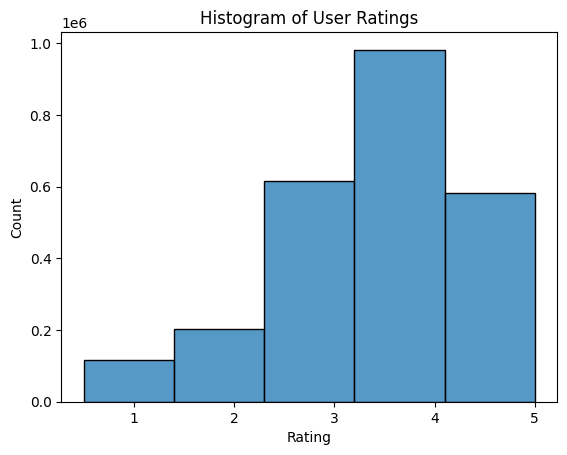

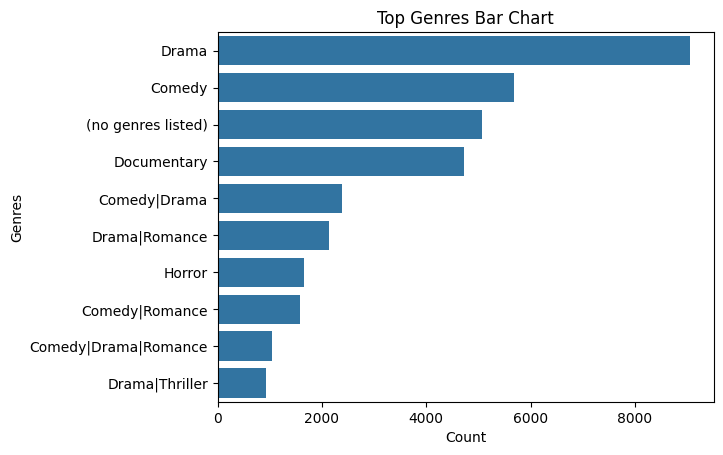

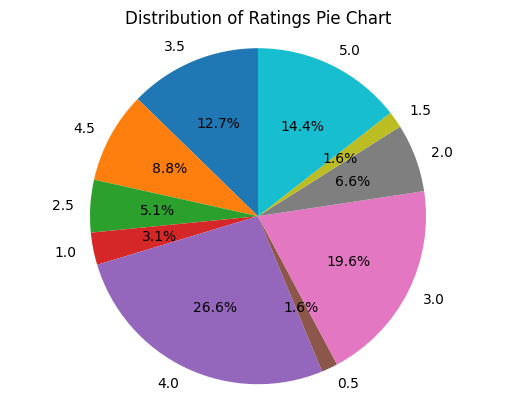

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\py4j\clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\py4j\java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\py4j\clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiv

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql.functions import desc
from pyspark.sql.functions import from_unixtime
from pyspark.sql import SparkSession
import findspark
findspark.init()
spark = SparkSession.builder \
    .appName("MovieRecommender") \
    .config("spark.hadoop.home.dir", "C:/hadoop") \
    .config("spark.executor.heartbeatInterval", "1000000s") \
    .config("spark.network.timeout", "3000000s") \
    .getOrCreate()

ratings = spark.read.csv("../ml-25m/ratings.csv", header=True, inferSchema=True)
tags = spark.read.csv("../ml-25m/tags.csv", header=True, inferSchema=True)
movies = spark.read.csv("../ml-25m/movies.csv", header=True, inferSchema=True)
links = spark.read.csv("../ml-25m/links.csv", header=True, inferSchema=True)

# Convert Spark DataFrame to Pandas DataFrame for analysis and plotting
ratings_sample = ratings.sample(fraction=0.1, seed=42)
ratings_pd = ratings_sample.toPandas()

# Analysis: Histogram of User Ratings
plt.figure()
sns.histplot(ratings_pd['rating'], bins=5, kde=False)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Histogram of User Ratings")
plt.show()

# Analysis: Bar Chart of Top Genres
genres_count = movies.groupBy("genres").count().orderBy(desc("count")).limit(10).toPandas()
plt.figure()
sns.barplot(x='count', y='genres', data=genres_count)
plt.xlabel("Count")
plt.ylabel("Genres")
plt.title("Top Genres Bar Chart")
plt.show()

# Analysis: Pie Chart of Distribution of Ratings
ratings_distribution = ratings.groupBy("rating").count().toPandas()
plt.figure()
plt.pie(ratings_distribution['count'], labels=ratings_distribution['rating'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Distribution of Ratings Pie Chart")
plt.show()
